In [41]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier   

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold 

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [42]:
# Load dataset as dataframe
df = pd.read_csv('pet_adoption_data.csv')
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [43]:
df['Vaccinated'].value_counts()

Vaccinated
1    1407
0     600
Name: count, dtype: int64

In [44]:
# Drop column
df = df.drop(columns=['PetID'])
df = df.drop(columns=['Breed'])
df.head()

,PetType,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Bird,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [45]:
columns = list(df.columns)
columns

['PetType',
 'AgeMonths',
 'Color',
 'Size',
 'WeightKg',
 'Vaccinated',
 'HealthCondition',
 'TimeInShelterDays',
 'AdoptionFee',
 'PreviousOwner',
 'AdoptionLikelihood']

In [46]:
df.dtypes

PetType                object
AgeMonths               int64
Color                  object
Size                   object
WeightKg              float64
Vaccinated              int64
HealthCondition         int64
TimeInShelterDays       int64
AdoptionFee             int64
PreviousOwner           int64
AdoptionLikelihood      int64
dtype: object

In [47]:




df['Vaccinated'] = df['Vaccinated'].replace({1: 'Yes', 0: 'No'})
df['PreviousOwner'] = df['PreviousOwner'].replace({1: 'Yes', 0: 'No'})
df['HealthCondition'] = df['HealthCondition'].replace({1: 'Good', 0: 'Bad'})

In [48]:
df.dtypes

PetType                object
AgeMonths               int64
Color                  object
Size                   object
WeightKg              float64
Vaccinated             object
HealthCondition        object
TimeInShelterDays       int64
AdoptionFee             int64
PreviousOwner          object
AdoptionLikelihood      int64
dtype: object

In [49]:
df.isnull().any()

PetType               False
AgeMonths             False
Color                 False
Size                  False
WeightKg              False
Vaccinated            False
HealthCondition       False
TimeInShelterDays     False
AdoptionFee           False
PreviousOwner         False
AdoptionLikelihood    False
dtype: bool

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetType             2007 non-null   object 
 1   AgeMonths           2007 non-null   int64  
 2   Color               2007 non-null   object 
 3   Size                2007 non-null   object 
 4   WeightKg            2007 non-null   float64
 5   Vaccinated          2007 non-null   object 
 6   HealthCondition     2007 non-null   object 
 7   TimeInShelterDays   2007 non-null   int64  
 8   AdoptionFee         2007 non-null   int64  
 9   PreviousOwner       2007 non-null   object 
 10  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 172.6+ KB


In [51]:
# Input column for prediction
features = df.drop(columns=['AdoptionLikelihood'])

# Output features
output = df['AdoptionLikelihood']

# One hot encoding for categorical variables
X_encoded = pd.get_dummies(features)
X_encoded.head()


,AgeMonths,WeightKg,TimeInShelterDays,AdoptionFee,PetType_Bird,PetType_Cat,PetType_Dog,PetType_Rabbit,Color_Black,Color_Brown,...,Color_White,Size_Large,Size_Medium,Size_Small,Vaccinated_No,Vaccinated_Yes,HealthCondition_Bad,HealthCondition_Good,PreviousOwner_No,PreviousOwner_Yes
0,131,5.039768,27,140,True,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
1,73,16.086727,8,235,False,False,False,True,False,False,...,True,True,False,False,True,False,True,False,True,False
2,136,2.076286,85,385,False,False,True,False,False,False,...,False,False,True,False,True,False,True,False,True,False
3,97,3.339423,61,217,True,False,False,False,False,False,...,True,False,False,True,True,False,True,False,False,True
4,123,20.498100,28,14,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,False,True


In [52]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf_dt = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
clf_dt.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

In [53]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf_rf = RandomForestClassifier(random_state = 0)

# Fitting model on training data
clf_rf.fit(train_X, train_y)

RandomForestClassifier(random_state=0)

In [54]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(X_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf_ab = AdaBoostClassifier(algorithm = 'SAMME', random_state = 0)

# Fitting model on training data
clf_ab.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME', random_state=0)

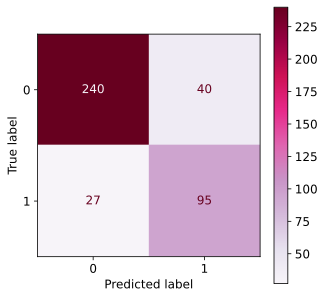

In [55]:
# Predictions on test set
y_pred_dt = clf_dt.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred_dt, labels = clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_dt.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

plt.savefig("adoption_dt_confusion_mat.svg");

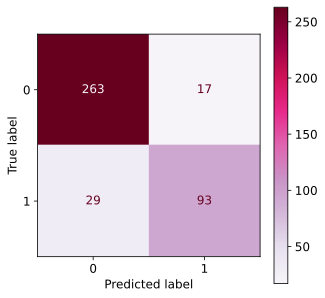

In [56]:
# Predictions on test set
y_pred_rf = clf_rf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred_rf, labels = clf_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_rf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

plt.savefig("adoption_rf_confusion_mat.svg");

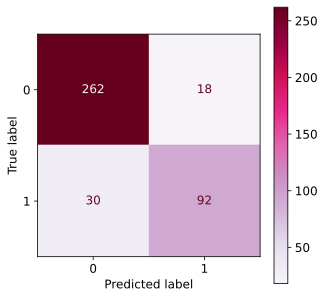

In [57]:
# Predictions on test set
y_pred_ab = clf_ab.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred_ab, labels = clf_ab.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_ab.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

plt.savefig("adoption_ab_confusion_mat.svg");

In [58]:
# Generating Classification Report
report = classification_report(test_y, y_pred_dt, output_dict = True)
report_df_dt = pd.DataFrame(report)
report_df_dt

# Save the report as a CSV File
report_df_dt.to_csv('adoption_dt_class_report.csv') 


In [59]:
# Generating Classification Report
report = classification_report(test_y, y_pred_rf, output_dict = True)
report_df_rf = pd.DataFrame(report)
report_df_rf

# Save the report as a CSV File
report_df_rf.to_csv('adoption_rf_class_report.csv') 

In [60]:
# Generating Classification Report
report = classification_report(test_y, y_pred_ab, output_dict = True)
report_df_ab = pd.DataFrame(report)
report_df_ab

# Save the report as a CSV File
report_df_ab.to_csv('adoption_ab_class_report.csv') 

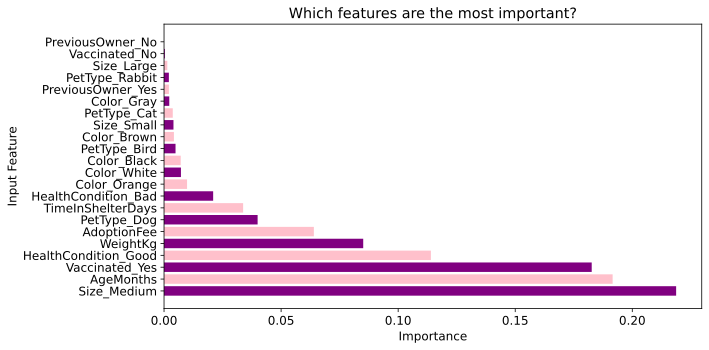

In [61]:
# Storing importance values from the trained model
importance = clf_dt.feature_importances_

# Storing feature importance as a dataframe
feature_imp_dt = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_dt = feature_imp_dt.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp_dt['Feature'], feature_imp_dt['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important?') 
plt.tight_layout()

plt.savefig("feature_imp_dt.svg");

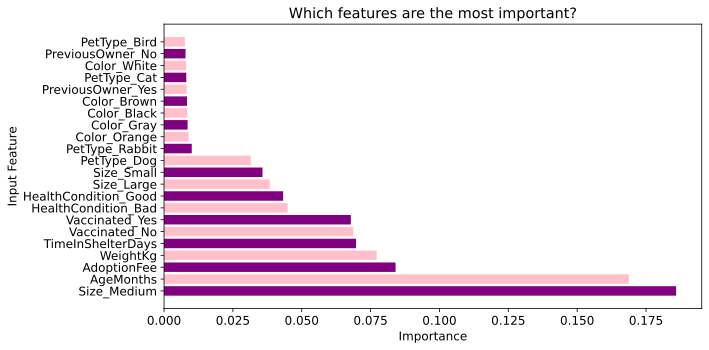

In [62]:
# Storing importance values from the trained model
importance = clf_rf.feature_importances_

# Storing feature importance as a dataframe
feature_imp_rf = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_rf = feature_imp_rf.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp_rf['Feature'], feature_imp_rf['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important?') 
plt.tight_layout()

plt.savefig("feature_imp_rf.svg");

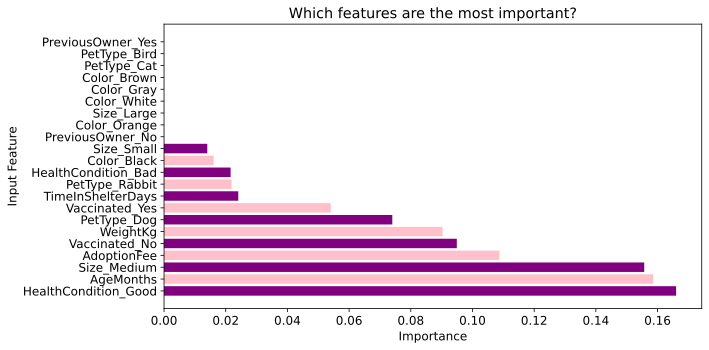

In [63]:
# Storing importance values from the trained model
importance = clf_ab.feature_importances_

# Storing feature importance as a dataframe
feature_imp_ab = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp_ab = feature_imp_ab.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp_ab['Feature'], feature_imp_ab['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important?') 
plt.tight_layout()

plt.savefig("feature_imp_ab.svg");

In [64]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_adoption.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf_dt, dt_pickle) 

# Close the file
dt_pickle.close() 

# Use this pickle file in the Streamlit app

In [65]:
# Pickle file: saving the trained RF model
# Creating the file where we want to write the model
rf_pickle = open('random_forest_adoption.pickle', 'wb') 

# Write RF model to the file
pickle.dump(clf_rf, rf_pickle) 

# Close the file
rf_pickle.close() 

# Use this pickle file in the Streamlit app

In [66]:
# Pickle file: saving the trained RF model
# Creating the file where we want to write the model
ab_pickle = open('adaboost_adoption.pickle', 'wb') 

# Write RF model to the file
pickle.dump(clf_ab, ab_pickle) 

# Close the file
ab_pickle.close() 

# Use this pickle file in the Streamlit app

#SOFT VOTING CLASSIFIER BELOW

In [67]:
f1_dt = f1_score(test_y, y_pred_dt, average='macro')
f1_rf = f1_score(test_y, y_pred_rf, average='macro')
f1_ab = f1_score(test_y, y_pred_ab, average='macro')

# Normalize F1 Scores
total_f1 = f1_ab + f1_dt + f1_rf
norm_dt = f1_dt / total_f1
norm_rf = f1_rf / total_f1
norm_ab = f1_ab / total_f1

# Print Weights
print(norm_dt, norm_rf, norm_ab)


0.32033198784538863 0.34103436870311254 0.3386336434514989


In [68]:
# Implement soft voting classifier on train data
clf_svm = VotingClassifier(estimators = [('dt', clf_dt), ('rf', clf_rf), ('ab', clf_ab)],
                                   voting = 'soft', 
                                   n_jobs = -1)

clf_svm.fit(train_X, train_y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=0)),
                             ('rf', RandomForestClassifier(random_state=0)),
                             ('ab',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 random_state=0))],
                 n_jobs=-1, voting='soft')

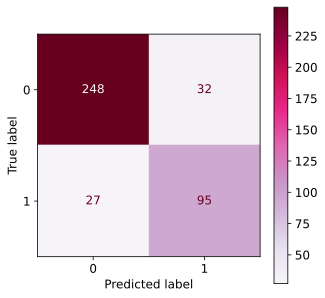

In [69]:
# Predictions on test set
y_pred_svm = clf_svm.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred_svm, labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_svm.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);

plt.savefig("adoption_svm_confusion_mat.svg");

In [70]:
# Generating Classification Report
report = classification_report(test_y, y_pred_svm, output_dict = True)
report_df_svm = pd.DataFrame(report)
report_df_svm

# Save the report as a CSV File
report_df_svm.to_csv('adoption_svm_class_report.csv') 

In [71]:
# Calculate weighted importance

weights = {
    'inputs': train_X.columns,
    'dt': clf_dt.feature_importances_ * norm_dt,
    'rf': clf_rf.feature_importances_ * norm_rf,
    'ab': clf_ab.feature_importances_ * norm_ab,
}

weights

{'inputs': Index(['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee',
        'PetType_Bird', 'PetType_Cat', 'PetType_Dog', 'PetType_Rabbit',
        'Color_Black', 'Color_Brown', 'Color_Gray', 'Color_Orange',
        'Color_White', 'Size_Large', 'Size_Medium', 'Size_Small',
        'Vaccinated_No', 'Vaccinated_Yes', 'HealthCondition_Bad',
        'HealthCondition_Good', 'PreviousOwner_No', 'PreviousOwner_Yes'],
       dtype='object'),
 'dt': array([0.0613779 , 0.02725276, 0.01082138, 0.02049999, 0.00157288,
        0.00119528, 0.01280369, 0.00066067, 0.002282  , 0.00135235,
        0.00071717, 0.00314959, 0.00231453, 0.00044823, 0.07006592,
        0.001291  , 0.00011466, 0.05851511, 0.00672094, 0.0365104 ,
        0.        , 0.00066555]),
 'rf': array([0.05755056, 0.02633251, 0.023776  , 0.02867132, 0.00258081,
        0.00275541, 0.01074425, 0.00343312, 0.00287454, 0.00284368,
        0.00291745, 0.00303981, 0.0027474 , 0.01309023, 0.06340935,
        0.0121922 , 0.0234366

In [72]:
# Feature Importance
svm_feat = weights['dt'] + weights['rf'] + weights['ab']
print(svm_feat)

[0.17263233 0.08416853 0.04274798 0.08598328 0.00415369 0.00395069
 0.0486087  0.01151114 0.01061191 0.00419603 0.00363462 0.0061894
 0.00506193 0.01353846 0.18619354 0.01823109 0.05569454 0.09995336
 0.0293277  0.10748147 0.0026597  0.00346991]


In [73]:
feature_list = train_X.columns.tolist()

feature_df = pd.DataFrame({
    'Feature': feature_list,
    'Importance': svm_feat
})

display(feature_df)

,Feature,Importance
0,AgeMonths,0.172632
1,WeightKg,0.084169
2,TimeInShelterDays,0.042748
3,AdoptionFee,0.085983
4,PetType_Bird,0.004154
5,PetType_Cat,0.003951
6,PetType_Dog,0.048609
7,PetType_Rabbit,0.011511
8,Color_Black,0.010612
9,Color_Brown,0.004196


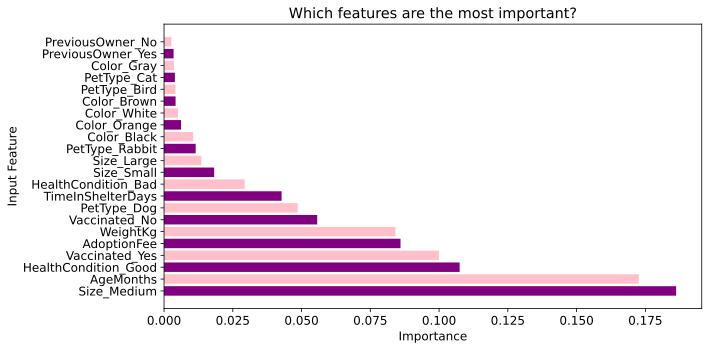

In [74]:
feature_df = feature_df.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_df['Feature'], feature_df['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important?') 
plt.tight_layout()

plt.savefig("feature_imp_svm.svg");

In [75]:
# Pickle file: saving the trained RF model
# Creating the file where we want to write the model
svm_pickle = open('svm_adoption.pickle', 'wb') 

# Write RF model to the file
pickle.dump(clf_svm, svm_pickle) 

# Close the file
svm_pickle.close() 

# Use this pickle file in the Streamlit app